In [1]:
import pandas as pd
import numpy as np

x_and_y = {'x': [5, 6, 4, 3], 'y': [16, 18, 13, 12]}
x_and_y

{'x': [5, 6, 4, 3], 'y': [16, 18, 13, 12]}

In [2]:
data = pd.DataFrame(data=x_and_y)
data

,x,y
0,5,16
1,6,18
2,4,13
3,3,12


<AxesSubplot: xlabel='x', ylabel='y'>

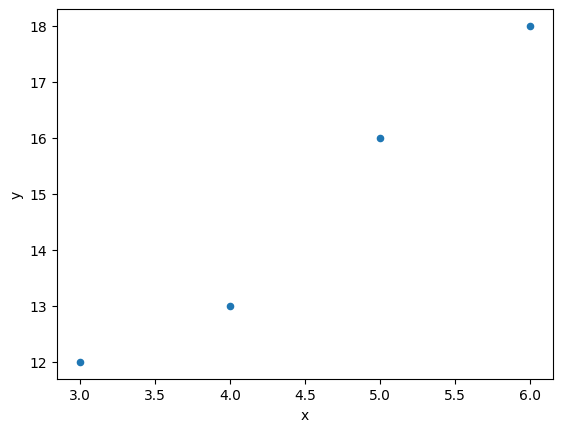

In [3]:
"""
The code data.plot.scatter(x='x', y='y') below, creates a scatter plot of the data in the data dataframe, where the x column is plotted on the x-axis and the y column is plotted on the y-axis. A scatter plot is a graph of two sets of data along the two axes, where each data point is represented as a dot. Scatter plots are useful for visualizing the relationship between two variables and identifying any patterns or trends in the data. In this code, data is a pandas dataframe that contains the x and y columns, and x and y are the column names that correspond to the x and y variables. The resulting scatter plot will show the distribution of the data points
"""
data.plot.scatter(x='x', y='y')

In [4]:
# corr_coef = data['x'].corr(data['y'])
# print(corr_coef)

In [5]:
"""
based on the given data, we can use the least squares method. The least squares method involves finding the values of a and b that minimize the sum of the squared differences between the predicted values of y and the actual values of y for each value of x. In this example, the numpy library is used to calculate the mean of x and y using the np.mean() function. The sum() function and list comprehension are used to calculate the numerator and denominator of the equation for a. The resulting values of a and b are printed to the console. Based on the given data, the parameters a and b that fit the linear regression model y = ax + b are approximately a = 0.8 and b = 10.4.
"""
x = [5, 6, 4, 3]
y = [16, 18, 13, 12]

x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = sum([(i - x_mean) * (j - y_mean) for i, j in zip(x, y)])
denominator = sum([(i - x_mean) ** 2 for i in x])

a = numerator / denominator
b = y_mean - a * x_mean

print('a:', a)
print('b:', b)

a: 2.1
b: 5.299999999999999


In [6]:
# PART 2

data = pd.read_csv('data.csv')
data

,Dim01,Dim02,Dim03,Dim04,Dim05
0,4.967090,-1.841413,0.724585,-9.520320,3.846499
1,1.580690,-4.403469,4.357162,-5.564291,6.725407
2,1.923565,-4.584510,4.518256,-5.916104,6.168051
3,9.546895,-6.494681,-5.682670,-0.040848,-6.848282
4,5.464841,-2.412718,1.637683,-9.103328,4.237185
...,...,...,...,...,...
195,10.408777,-6.466638,-5.897143,-1.395442,-6.538644
196,2.037687,-5.491499,4.947264,-4.872210,6.269887
197,1.764763,-4.247675,4.378171,-5.516902,6.178763
198,5.248208,-1.460972,0.547917,-8.830962,3.875138


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

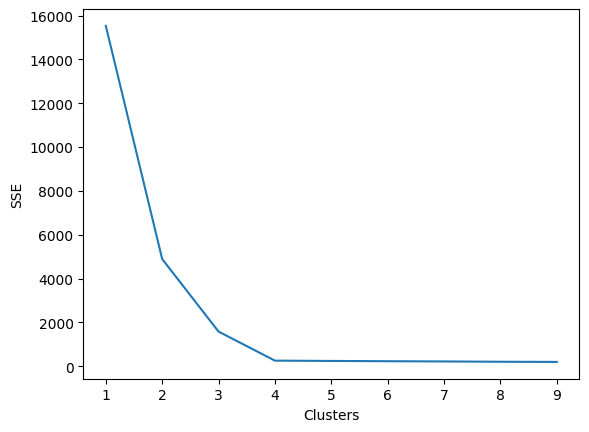

In [7]:
# import numpy as np
"""
The elbow method is a heuristic used to determine the optimal number of clusters when partitioning data using the k-means clustering algorithm. The method involves plotting the explained variation as a function of the number of clusters and selecting the "elbow" of the curve as the optimal number of clusters to use. The elbow is the point of inflection in the curve, where the explained variation begins to level off. The elbow of the curve can be identified visually as the point where the SSE begins to level off. It is important to note that the elbow method is a heuristic and may not always provide a clear indication of the optimal number of clusters. In some cases, other methods such as silhouette analysis or gap statistics may be more appropriate.
"""
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data

# Run the k-means clustering algorithm for a range of values of k
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)
# Plot the SSE for each value of k
plt.plot(range(1, 10), sse)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


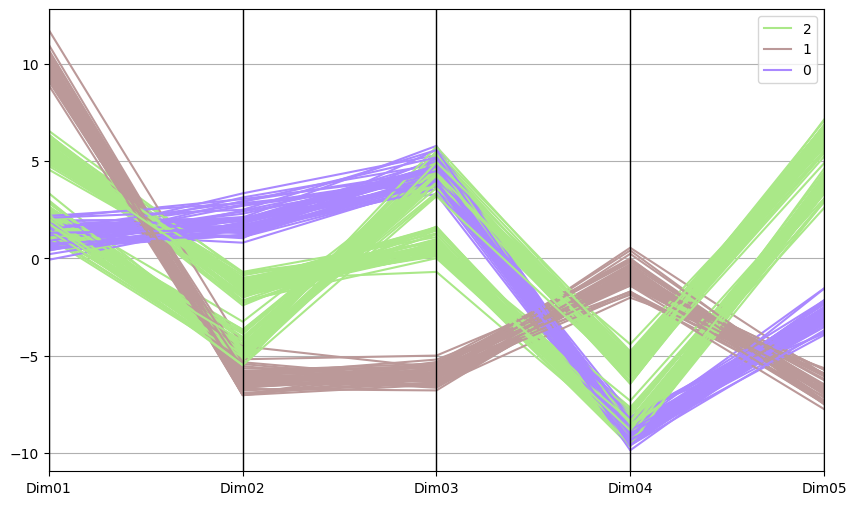

In [8]:
"""
To partition the target data using the k-means clustering algorithm and visualize the target data using parallel coordinates, you can use the following steps:  Import the necessary libraries, including pandas, sklearn, and matplotlib.  Load the target data into a pandas dataframe.  Use the sklearn.cluster.KMeans class to perform k-means clustering on the data, specifying the desired number of clusters.  Add a new column to the dataframe that indicates the cluster assignment for each data point.  Use the pandas.plotting.parallel_coordinates() function to create a parallel coordinates plot of the data, with each cluster represented by a different color.
"""
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Load the data
data = pd.read_csv('data.csv')

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
# Add cluster assignments to the dataframe
data['cluster'] = kmeans.labels_
# Create a parallel coordinates plot of the data
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(data, 'cluster', color=('#AAE888', '#BB9999', '#AA88FF'))
plt.show()

In [13]:
import calendar


def print_calendar(year):
    # Print the year header
    print("Calendar for", year)

    # Print the calendar for each month
    for month in range(1, 13):
        # Print the month header
        print(calendar.month_name[month])
        print("Mo Tu We Th Fr Sa Su")

        # Get the number of days in the month and the day of the week of the first day
        num_days = calendar.monthrange(year, month)[1]
        first_day = calendar.weekday(year, month, 1)

        # Print the days of the month
        for i in range(first_day):
            print("   ", end="")
        for day in range(1, num_days + 1):
            print("{:2d}".format(day), end=" ")
            if (day + first_day) % 7 == 0:
                print()
        print()

print_calendar(2023)

Calendar for 2023
January
Mo Tu We Th Fr Sa Su
                   1 
 2  3  4  5  6  7  8 
 9 10 11 12 13 14 15 
16 17 18 19 20 21 22 
23 24 25 26 27 28 29 
30 31 
February
Mo Tu We Th Fr Sa Su
       1  2  3  4  5 
 6  7  8  9 10 11 12 
13 14 15 16 17 18 19 
20 21 22 23 24 25 26 
27 28 
March
Mo Tu We Th Fr Sa Su
       1  2  3  4  5 
 6  7  8  9 10 11 12 
13 14 15 16 17 18 19 
20 21 22 23 24 25 26 
27 28 29 30 31 
April
Mo Tu We Th Fr Sa Su
                1  2 
 3  4  5  6  7  8  9 
10 11 12 13 14 15 16 
17 18 19 20 21 22 23 
24 25 26 27 28 29 30 

May
Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7 
 8  9 10 11 12 13 14 
15 16 17 18 19 20 21 
22 23 24 25 26 27 28 
29 30 31 
June
Mo Tu We Th Fr Sa Su
          1  2  3  4 
 5  6  7  8  9 10 11 
12 13 14 15 16 17 18 
19 20 21 22 23 24 25 
26 27 28 29 30 
July
Mo Tu We Th Fr Sa Su
                1  2 
 3  4  5  6  7  8  9 
10 11 12 13 14 15 16 
17 18 19 20 21 22 23 
24 25 26 27 28 29 30 
31 
August
Mo Tu We Th Fr Sa Su
    1  2  3  4  5  6 